# Лабораторная работа 3
Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

Цель лабораторной работы: изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

Задание:

Выберите набор данных (датасет) для решения задачи классификации или регрессии.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.

Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
Сравните метрики качества исходной и оптимальной моделей.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

goal_column='Gender'

%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./GenderDataSet.csv')
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
data.shape

(66, 5)

## Удаление пропусков

Удалим колонки, содержащие пустые значения

In [4]:
data = data.dropna(axis=1, how='any')
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
data.shape

(66, 5)

Проверим что пропуски отсутствуют

In [6]:
data.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

## Кодирование категориальных признаков

In [7]:
le = LabelEncoder()
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        data[col] = le.fit_transform(data[col])
        print(col)

Favorite Color
Favorite Music Genre
Favorite Beverage
Favorite Soft Drink
Gender


## Разделение выборки на обучающую и тестовую

Разделим данные на целевой столбец и признаки

In [8]:
X = data.drop(goal_column, axis=1)
X

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,6,3,0
1,1,2,3,1
2,2,6,5,1
3,2,1,4,2
4,0,6,3,1
...,...,...,...,...
61,0,6,3,1
62,0,2,0,1
63,1,2,1,2
64,0,6,5,1


In [9]:
Y = data[[goal_column]]
Y

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
61,1
62,1
63,1
64,1


С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [11]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (49, 4)
X_test: (17, 4)
Y_train: (49, 1)
Y_test: (17, 1)


## Обучение модели с произвольным гиперпараметром

In [12]:
cl1_1 = KNeighborsClassifier(n_neighbors=32)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

(0.6122448979591837, 0.29411764705882354)

## Построение и оценка качества модели

In [13]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y, cv=3)
scores

array([0.63636364, 0.54545455, 0.63636364])

Усредненное значение метрики accuracy для 3 фолдов

In [14]:
np.mean(scores)

0.606060606060606

## Подбор гиперпараметра

Произведем подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [15]:
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [16]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf_gs.fit(X, Y)
clf_gs.best_params_

CPU times: user 479 ms, sys: 2.94 ms, total: 482 ms
Wall time: 481 ms


{'n_neighbors': 25}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

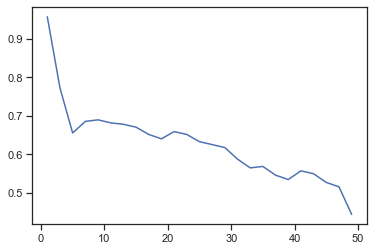

In [17]:
plt.plot(n_range, clf_gs.cv_results_["mean_train_score"]);

Очевидно, что для K=1  на тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность. Посмотрим на тестовом наборе данных

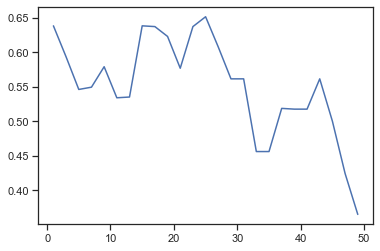

In [18]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

Проверим получившуюся модель:

In [19]:
cl1_2 = KNeighborsClassifier(**clf_gs.best_params_)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(0.6938775510204082, 0.47058823529411764)